In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from typing import List
import math

# Image generation

Generates image based on the formula: <br>
$B_{x,y} = B_{mid}+(B_{max}-B_{min})*cos(2*\pi*(\epsilon+\frac{(X- X_{mid})^2+(Y-Y_{mid})^2}{R_{d}}))$ <br>



In [57]:
class ImageGenerator:
    def __init__(self, 
                 width: int=640, 
                 height: int=480, 
                 max_pixel_brightness: int=210, 
                 min_pixel_brightness: int=40
                 ) -> None:
        """Class for generating images

        Args:
            width (int, optional): Width of the generated image. Defaults to 640.
            height (int, optional): Height of the generated image. Defaults to 480.
            max_pixel_brightness (int, optional): Maximal image brightness. Defaults to 210.
            min_pixel_brightness (int, optional): Minimal image brightness. Defaults to 40.
        """
        self.width = width
        self.height = height
        self.max_brightness = max_pixel_brightness
        self.min_brightness = min_pixel_brightness
        self.mean_brightness = (max_pixel_brightness+min_pixel_brightness)/2
        self.diff_brightness = max_pixel_brightness - self.mean_brightness
        self.width_center = width / 2
        self.height_center = height / 2
        self.diff_between_rings = width*width / 6.07 # why 6.07 instead of 6.0
        
    def compute_single_pixel(self, x: int, y: int, epsilon: float) -> float:
        """Compute value of single pixel based on coordinates [X, Y]

        Args:
            coords (List[int]): List of two integers in range of image size

        Returns:
            int: Value of pixel color in grayscale
        """
        # why nominator in the equation is multiplied by 2
        # why 
        value = self.mean_brightness + (self.diff_brightness * math.cos(2*math.pi*(epsilon + ((pow((x - self.width_center)*2, 2) + pow((y - self.height_center)*2, 2)) / self.diff_between_rings ))))
        return value
        
    def generate_pure_image(self, epsilon: float) -> np.array:
        """Generate pure image

        Args:
            epsilon (float): epsilon value of float type in range 0.0 to 1.0

        Returns:
            np.array: 2D numpy matrix which represents image
        """
        img=np.ones((self.height,self.width))
        img=img[:,:]*self.mean_brightness
        for x in range (self.width):
            for y in range(self.height):
                img[y,x]=img[y,x]+self.compute_single_pixel(x, y)
        img=img.astype(np.uint8)
        return img
        
        
            

In [58]:
generator = ImageGenerator()

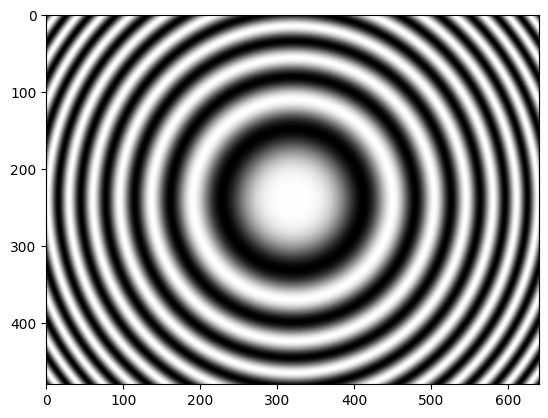

In [64]:
img = generator.generate_pure_image(1.0)
plt.imshow(img, cmap='gray')